# apyxl vs Regression Discontinuity Design

In this notebook, we will compare two approaches to causal inference: the traditional [Regression Discontinuity Design](https://en.wikipedia.org/wiki/Regression_discontinuity_design) (RDD) and a machine learning-based method implemented in the `apyxl` package, which integrates XGBoost with SHAP analysis.

RDD is a widely used quasi-experimental method that leverages a known threshold in an assignment variable to estimate causal effects. In this example, we assume the discontinuity threshold is known in advance, making RDD a useful tool for analyzing causal relationships when a clear cutoff point exists. However, RDD depends on prior knowledge of the threshold, which can limit its applicability in cases where this information is not readily available.

The approach used by `apyxl` offers an alternative by applying machine learning techniques (XGBoost) alongside SHAP (Shapley Additive Explanations) to identify important features and patterns in the data. This method does not require prior knowledge of the discontinuity threshold, allowing it to potentially identify critical points and relationships from the data itself. In this notebook, we will apply both methods to the same dataset, providing a comparison of their results and exploring the potential advantages of each approach, particularly in scenarios where prior knowledge of key variables is uncertain.

The data used come from this nice course : https://evalsp21.classes.andrewheiss.com/example/rdd/. It applies RDD to a to dataset :

```
In this hypothetical example, students take an entrance exam at the beginning of a school year. Those who score 70 or below are automatically enrolled in a free tutoring program and receive assistance throughout the year. At the end of the school year, students take a final test, or exit exam (with a maximum of 100 points) to measure how much they learned overall. Remember, this is a hypothetical example and tests like this don’t really exist, but just go with it.

You have a dataset with four columns in it:

- id: The ID of the student
- entrance_exam: The student’s entrance exam score (out of 100)
- exit_exam: The student’s exit exam score (out of 100)
- tutoring: An indicator variable showing if the student was enrolled in the tutoring program
```

Cyril Joly

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from apyxl import XGBRegressorWrapper

In [2]:
df = pd.read_csv("https://evalsp21.classes.andrewheiss.com/data/tutoring_program.csv", index_col='id')
df['tutoring'] = df['tutoring'].astype(int)
df.sample(3)

,entrance_exam,exit_exam,tutoring
id,,,
446,80.1,67.0,0
714,80.0,57.6,0
134,75.7,59.9,0


In [3]:
target = 'exit_exam'
X, y = df.drop(columns=target), df[target]
model = XGBRegressorWrapper().fit(X, y)
model.best_score

0.23034344312295926

In [4]:
shap_values = model.compute_shap_values(X)

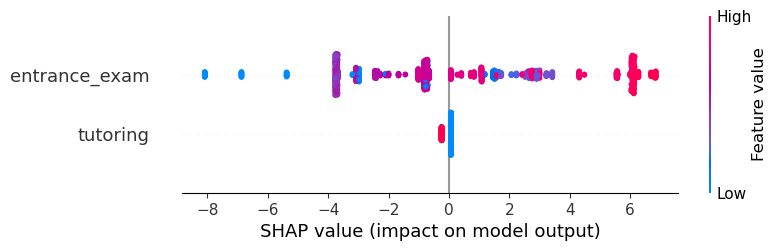

In [5]:
model.beeswarm(shap_values=shap_values)

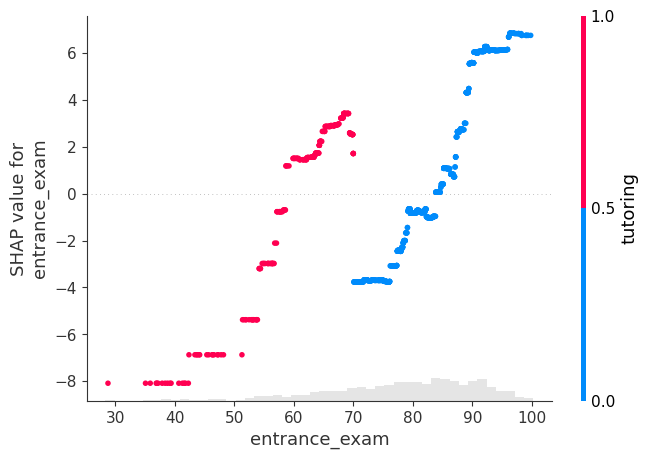

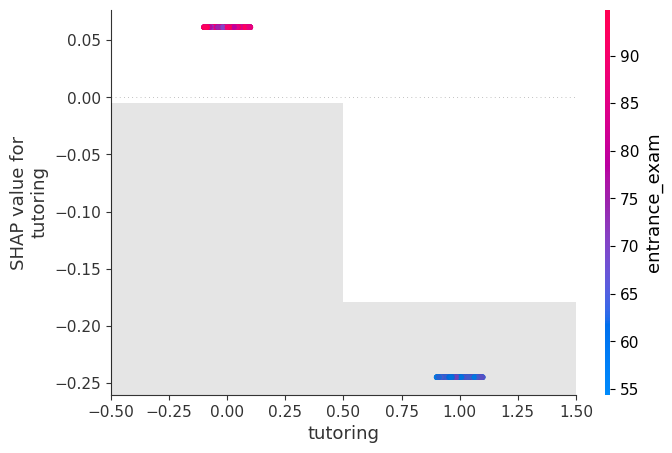

In [6]:
model.scatter(shap_values=shap_values, feature='entrance_exam')
model.scatter(shap_values=shap_values, feature='tutoring')

With ``apyxl``, the user doesn't need to construct the variable ``tutoring``, as its information is fully contained in ``entrance_exam`` (a comparison to a specific threshold). The non-linear approach of ``apyxl`` is a superior alternative when the user has no prior knowledge of the threshold, allowing the ``xgboost`` algorithm to discover it automatically.

In [7]:
target = 'exit_exam'
X, y = df[['entrance_exam']], df[target]
model = XGBRegressorWrapper().fit(X, y)
model.best_score

0.23084121198922328

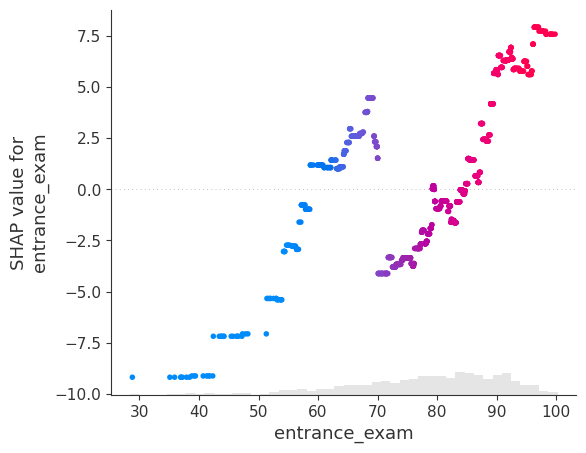

In [8]:
shap_values = model.compute_shap_values(X)
model.scatter(shap_values=shap_values, feature='entrance_exam')

The size of the discontinuity, of the effect can then be estimated between $+6$ and $+9$.